In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
household_prices_without_VAT = pd.read_excel(r'/Users/shakhawathossainturag/Downloads/Energiepreisentwicklung.xlsx',sheet_name='5.8.2 Strom - € - Haushalte', skiprows = 5, nrows = 26, index_col = 0)
household_prices_without_VAT = household_prices_without_VAT.iloc[:,0]
#household_prices_without_VAT.columns = ["year","price"]
household_prices_without_VAT = household_prices_without_VAT.reset_index()
household_prices_without_VAT.head()

,index,Unnamed: 1
0,1. HJ 2008,21.48
1,2. HJ 2008,21.95
2,1. HJ 2009,22.82
3,2. HJ 2009,22.94
4,1. HJ 2010,23.75


In [3]:

household_prices_without_VAT["index"]= household_prices_without_VAT["index"].str.slice(start = 5)
household_prices_without_VAT.columns = ["year","price"]


In [4]:
household_prices_without_VAT

,year,price
0,2008,21.48
1,2008,21.95
2,2009,22.82
3,2009,22.94
4,2010,23.75
5,2010,24.38
6,2011,25.28
7,2011,25.31
8,2012,25.95
9,2012,26.76


In [5]:
household_prices_without_VAT = household_prices_without_VAT.set_index("year")

household_prices_without_VAT.index = household_prices_without_VAT.index.astype(str)
household_prices_without_VAT.index =  pd.to_datetime(household_prices_without_VAT.index, errors='ignore')
household_prices_without_VAT = household_prices_without_VAT.astype(float)
household_prices_without_VAT = household_prices_without_VAT.resample('12M').mean()
household_prices_without_VAT.index = household_prices_without_VAT.index.astype(str)
household_prices_without_VAT

,price
year,
2008-01-31,21.715
2009-01-31,22.880
2010-01-31,24.065
2011-01-31,25.295
2012-01-31,26.355
2013-01-31,29.200
2014-01-31,29.775
2015-01-31,29.485
2016-01-31,29.730


In [6]:
household_prices_without_VAT.index= household_prices_without_VAT.index.str.slice(start = 0, stop = -6)
household_prices_without_VAT

,price
year,
2008,21.715
2009,22.880
2010,24.065
2011,25.295
2012,26.355
2013,29.200
2014,29.775
2015,29.485
2016,29.730


In [7]:
household_prices_without_VAT = household_prices_without_VAT[6:].reset_index()

Do you have predefined value for electricity price?
Yes = 1 / No = 2
[29.775 29.485 29.73  30.48  29.935 29.83  30.245 30.66 ]


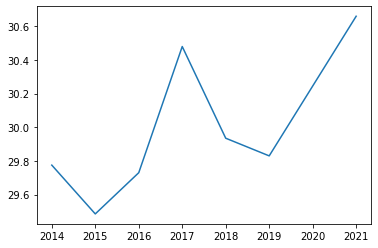

In [10]:


print("Do you have predefined value for electricity price?")
print("Yes = 1 / No = 2")
#choose = 0
val = input("Enter your value: ")
val = int(val)
if (val == 1):
    val1 = input("Enter your preferred price: ")
    val1 = float(val1)
    household_prices_without_VAT["year"] = household_prices_without_VAT["year"].astype(int)
    year = household_prices_without_VAT["year"]
    price = household_prices_without_VAT["price"]

    new_year = np.append(year, 2021)
    new_price = np.append(price, val1)
    print(new_year)
    print(new_price)
    plt.figure()
    plt.plot (new_year, new_price)
    plt.show()

elif (val == 2):
    household_prices_without_VAT["year"] = household_prices_without_VAT["year"].astype(int)
    year = household_prices_without_VAT["year"]
    price = household_prices_without_VAT["price"]

    f = interpolate.interp1d(year, price, fill_value = "extrapolate")


    p_2021 = f(2021)

    new_year = np.append(year, 2021)
    new_price = np.append(price, f(2021))
    print(new_price)
    plt.figure()
    plt.plot (new_year, new_price)
    plt.show()


